#Download data from kaggle 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aftabanjum1","key":"7051a49e833eb888b6c19eed45adeed5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

sentiment-analysis-on-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'data from kaggle to google cloab directly code.txt'
 drive
'kaggle (1).json'
 kaggle.json
 sample_data
 sentiment-analysis-on-movie-reviews.zip


In [ ]:
!pip install pyunpack
!pip install patool

In [ ]:
from pyunpack import Archive
Archive('sentiment-analysis-on-movie-reviews.zip').extractall('/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/sentiment_anlaysiss_on-movie-reviews')


Data loading

In [ ]:
import re
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from pyunpack import Archive
Archive('/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/sentiment_anlaysiss_on-movie-reviews/train.tsv.zip').extractall('/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/sentiment_anlaysiss_on-movie-reviews')


In [ ]:
import pandas as pd
df_movies_train = pd.read_csv("/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/sentiment_anlaysiss_on-movie-reviews/train.tsv",sep='\t')
df_movies_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


## Data Exploration & Data Cleaning 

In [ ]:
#Total number of classes 
df_movies_train['Sentiment'].unique()

array([1, 2, 3, 4, 0])

In [ ]:
df_movies_train.drop(['PhraseId','SentenceId'], axis =1, inplace = True)
df_movies_train.head(5)

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [ ]:
# remove the row where toltal length is <=3
df_movies_train['ZipLen'] = df_movies_train['Phrase'].astype(str).map(len)
df_movies_train.drop(df_movies_train[df_movies_train['ZipLen']<=3].index, inplace = True)
df_movies_train.reset_index(drop=True, inplace=True)

2    78996
3    32890
1    27235
4     9202
0     7071
Name: Sentiment, dtype: int64

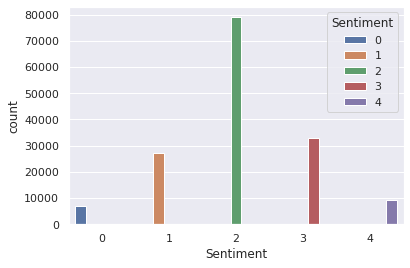

In [ ]:
#check the class distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Sentiment', hue="Sentiment", data=df_movies_train)
df_movies_train.Sentiment.value_counts()

In [ ]:
df_movies_train.head()

,Phrase,Sentiment,ZipLen
0,A series of escapades demonstrating the adage ...,1,188
1,A series of escapades demonstrating the adage ...,2,77
2,A series,2,8
3,series,2,6
4,of escapades demonstrating the adage that what...,2,68


In [ ]:
x_phrases_data=df_movies_train['Phrase'].values
y_label=df_movies_train['Sentiment'].values

In [ ]:
def data_pre_processing(data):
  corpus = []
  for i in range(len(data)):
      review = re.sub('[^a-zA-Z]', ' ', data[i])
      review = review.lower()
      review = review.split()
      #review = [word for word in review if word not in stopwords.words('english')]
      review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  return corpus
process_data=data_pre_processing(df_movies_train['Phrase'].values)
df_train=pd.DataFrame(process_data)
F_DTA_frame = pd.concat([df_train,df_movies_train['Sentiment']], axis=1)

In [ ]:
df_train.shape,df_movies_train.shape,F_DTA_frame.shape,df_movies_train['Sentiment'].shape

((155394, 1), (155394, 3), (155394, 2), (155394,))

In [ ]:
# remove duplicate values and non values 
F_DTA_frame.columns=['text','Sentiment']
print(F_DTA_frame.isna().sum())
F_DTA_frame.drop_duplicates(subset='text',keep='first',inplace=True)
print(F_DTA_frame.isnull().any())

text         0
Sentiment    0
dtype: int64
text         False
Sentiment    False
dtype: bool


In [ ]:
F_DTA_frame['Sentiment'].shape,F_DTA_frame.shape

((57572,), (57572, 2))

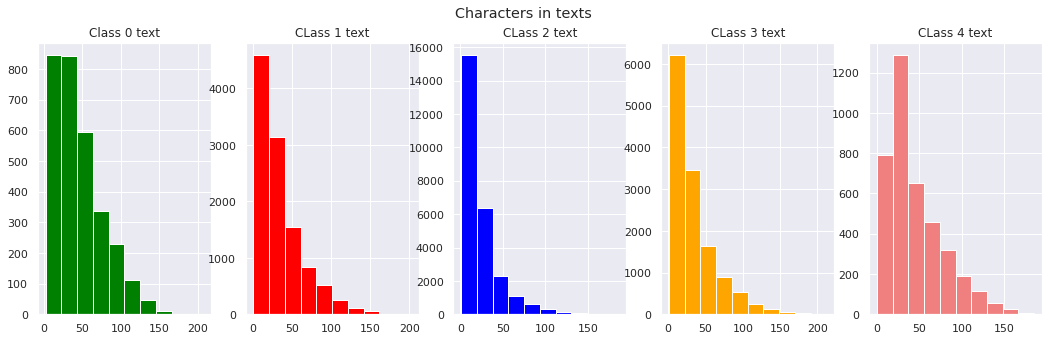

In [ ]:
#Number of characters in texts
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
text_len=F_DTA_frame[F_DTA_frame['Sentiment']==0]['text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Class 0 text')

text_len=F_DTA_frame[F_DTA_frame['Sentiment']==1]['text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('CLass 1 text')

text_len=F_DTA_frame[F_DTA_frame['Sentiment']==2]['text'].str.len()
ax3.hist(text_len,color='blue')
ax3.set_title('CLass 2 text')

text_len=F_DTA_frame[F_DTA_frame['Sentiment']==3]['text'].str.len()
ax4.hist(text_len,color='orange')
ax4.set_title('CLass 3 text')

text_len=F_DTA_frame[F_DTA_frame['Sentiment']==4]['text'].str.len()
ax5.hist(text_len,color='lightcoral')
ax5.set_title('CLass 4 text')
fig.suptitle('Characters in texts')
plt.show()

#### Average word length in a text

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Average word length in each text')

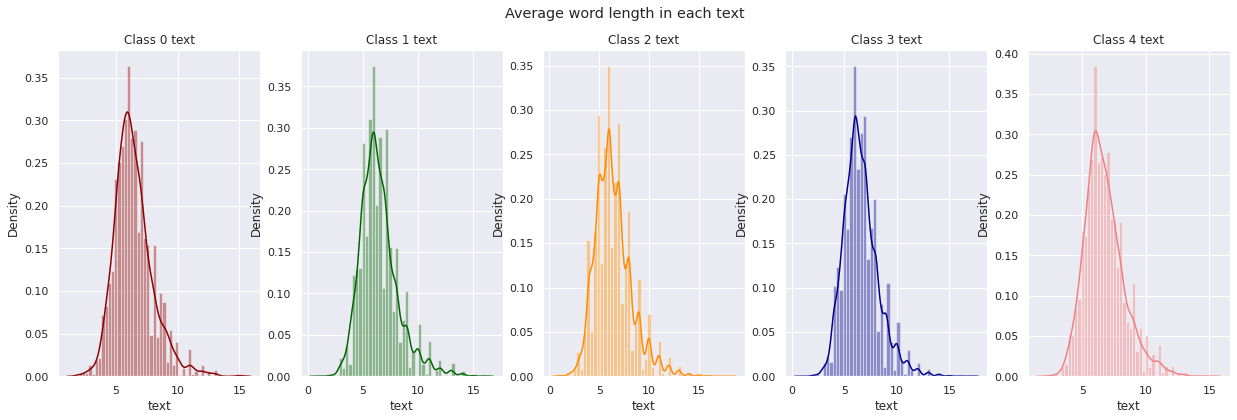

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(21,6))
word=F_DTA_frame[F_DTA_frame['Sentiment']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='darkred')
ax1.set_title('Class 0 text')
word=F_DTA_frame[F_DTA_frame['Sentiment']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='darkgreen')
ax2.set_title('Class 1 text')
word=F_DTA_frame[F_DTA_frame['Sentiment']==2]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='darkorange')
ax3.set_title('Class 2 text')
word=F_DTA_frame[F_DTA_frame['Sentiment']==3]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='darkblue')
ax4.set_title('Class 3 text')
word=F_DTA_frame[F_DTA_frame['Sentiment']==4]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='lightcoral')
ax5.set_title('Class 4 text')
fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(F_DTA_frame.text)

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(15)
most_common = dict(most_common)
most_common

{'character': 1144,
 'comedy': 806,
 'even': 766,
 'film': 3075,
 'good': 820,
 'life': 767,
 'like': 1529,
 'lrb': 1108,
 'make': 1010,
 'movie': 2810,
 'n': 1466,
 'one': 1523,
 'rrb': 1373,
 'story': 1088,
 'time': 940}

#### Unigram, Bigram,Trigram

#### Unigram Analysis

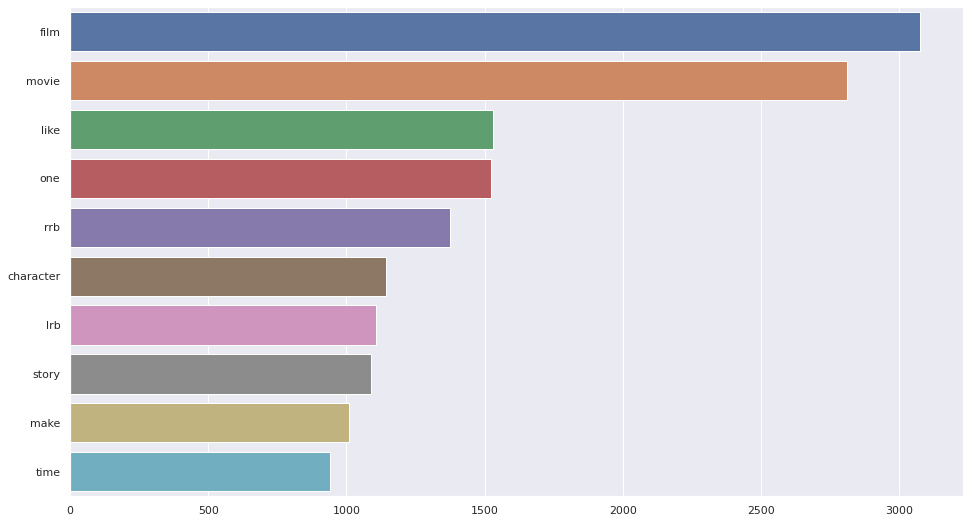

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(F_DTA_frame.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

####Bigram Analysis

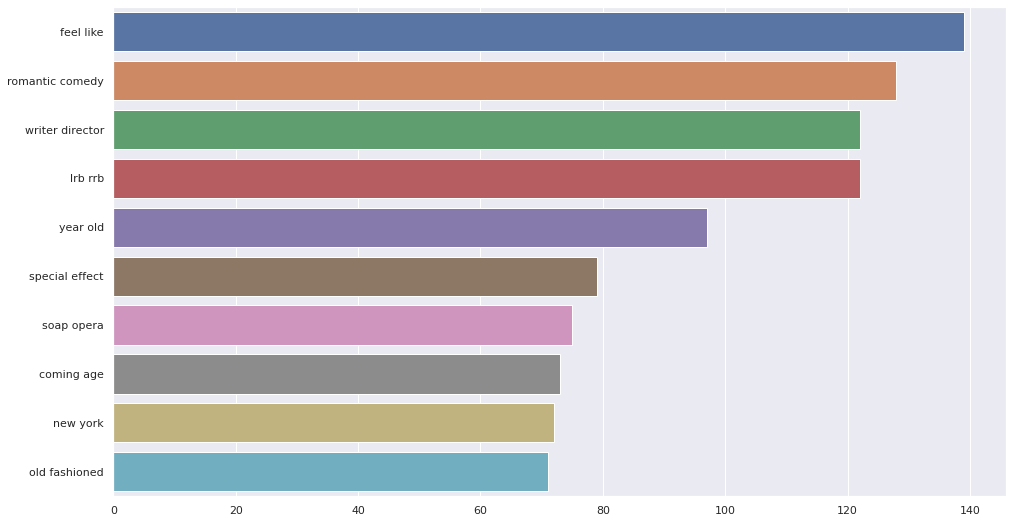

In [ ]:
#Bigrame
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(F_DTA_frame.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

####Trigram Analysis

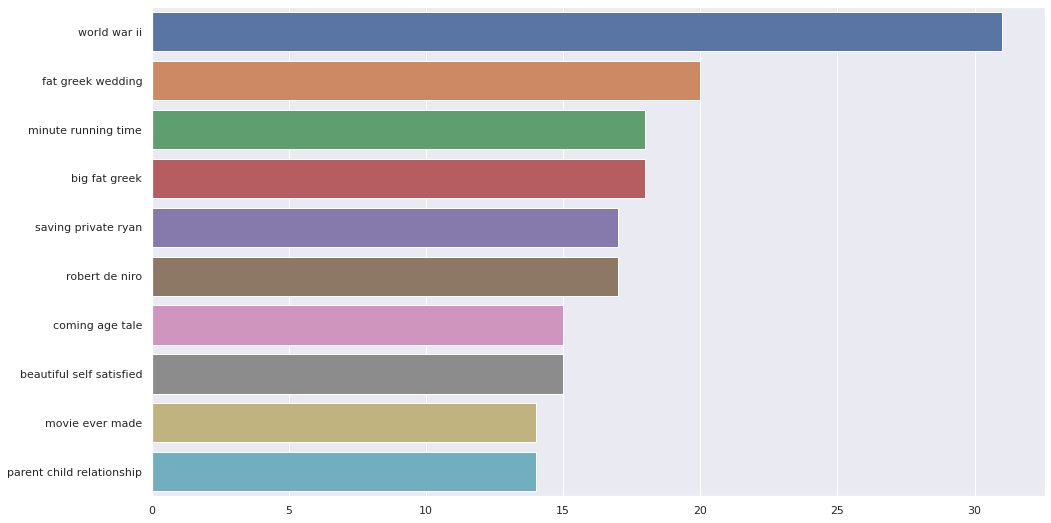

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(F_DTA_frame.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [ ]:
F_DTA_frame['Sentiment']
F_DTA_frame['text']
dat_movie_train=pd.concat([F_DTA_frame['text'],F_DTA_frame['Sentiment']],axis=1)
dat_movie_train.head()

dictionary={2:2,4:4,3:4,0:0,1:0     
}
dat_movie_train['Sentiment']=dat_movie_train['Sentiment'].map(dictionary)

dat_movie_train.head()

,text,Sentiment
0,series escapade demonstrating adage good goose...,0
1,series escapade demonstrating adage good goose,2
7,demonstrating adage good goose,2
8,demonstrating adage,2
9,demonstrating,2


2    30506
4    21656
0    17901
Name: Sentiment, dtype: int64

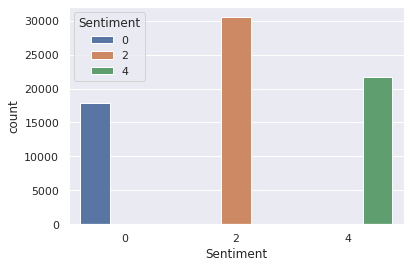

In [ ]:
#check the class distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Sentiment', hue="Sentiment", data=dat_movie_train)
dat_movie_train.Sentiment.value_counts()

# ML Model





## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat_movie_train['text'], dat_movie_train['Sentiment'] ,test_size = 0.2, random_state=42)



text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54      2813
           2       0.59      0.71      0.64      5271
           4       0.64      0.56      0.60      3431

    accuracy                           0.61     11515
   macro avg       0.61      0.58      0.59     11515
weighted avg       0.61      0.61      0.60     11515



## Naive Bias

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat_movie_train['text'], dat_movie_train['Sentiment'] ,test_size = 0.2, random_state=42)

text_clf_1 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

text_clf_1.fit(X_train, y_train)


predicted = text_clf_1.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.37      0.46      2813
           2       0.55      0.72      0.62      5271
           4       0.63      0.53      0.57      3431

    accuracy                           0.58     11515
   macro avg       0.59      0.54      0.55     11515
weighted avg       0.59      0.58      0.57     11515



# Deep Learning Model

### CNN

In [ ]:
from keras.layers import Dropout, Dense,Input,Embedding,Flatten, MaxPooling1D, Conv1D
from keras.models import Sequential,Model
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from keras.layers.merge import Concatenate
from tensorflow.keras.layers import Dense

In [ ]:
#convert text to word embedding (Using GloVe):
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open("/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/glove.6B.300d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)

In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=300, dropout=0.7):
    model = Sequential()
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])),
                                 "into shape",str(len(embedding_vector))," Please make sure your"
                                 " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))

    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_cov2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(300, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(200, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat_movie_train['text'], dat_movie_train['Sentiment'] ,test_size = 0.1, random_state=200)


In [ ]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test)

model_CNN = Build_Model_CNN_Text(word_index,embeddings_index, 5)

model_CNN.summary()

history=model_CNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=30,
                              batch_size=64,
                              verbose=2)

Found 13578 unique tokens.
(57572, 500)
Total 400001 word vectors.
Filter   5
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 300)     4073700     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 499, 128)     76928       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 498, 128)     115328      embedding_2[0][0]                
______________

In [ ]:
predicted = model_CNN.predict(X_test_Glove)
predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.22      0.34      1426
           2       0.52      0.92      0.66      2648
           4       0.78      0.28      0.41      1684

    accuracy                           0.56      5758
   macro avg       0.67      0.47      0.47      5758
weighted avg       0.64      0.56      0.51      5758



## RCNN

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import GRU
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open("/content/drive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/glove.6B.300d.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)

In [63]:
def Build_Model_RCNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=300):

    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256

    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])),
                                 "into shape",str(len(embedding_vector))," Please make sure your"
                                 " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)

            embedding_matrix[i] = embedding_vector



    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dense(1024,activation='relu'))
    model = Dropout(dropout)(model)
    model.add(Dense(500,activation='relu'))
    
    model = Dropout(dropout)(model)
    model.add(Dense(200,activation='relu'))
    model = Dropout(dropout)(model)
    model.add(Dense(70,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


In [64]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dat_movie_train['text'], dat_movie_train['Sentiment'] ,test_size = 0.1, random_state=200)

X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test)

Found 13578 unique tokens.
(57572, 500)
Total 400001 word vectors.


In [65]:
model_RCNN = Build_Model_CNN_Text(word_index,embeddings_index, 5)
model_RCNN.summary()
model_RCNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=30,
                              batch_size=128,
                              verbose=2)


Filter   5
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 500, 300)     4073700     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_42 (Conv1D)              (None, 499, 128)     76928       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_43 (Conv1D)              (None, 498, 128)     115328      embedding_6[0][0]                
_________________________________________________________________________________

In [67]:
predicted = model_RCNN.predict(X_test_Glove)
predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.67      0.31      0.43      1426
           2       0.53      0.88      0.66      2648
           4       0.74      0.32      0.45      1684

    accuracy                           0.58      5758
   macro avg       0.65      0.50      0.51      5758
weighted avg       0.63      0.58      0.54      5758

